<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_isco3/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04_RandomForestによる分類モデルの評価
RandomForestで学習した分類モデルを読み込んで、評価してみましょう。  

---

### 🌐 参考サイト
#### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)  

---

### ⬇️ ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install matplotlib-fontja

### 📁 GoogleDrive の Mount

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショートカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

### ➜]　ライブラリのimport

In [1]:
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # matplotlib.pyplot モジュールを読み込む（可視化ライブラリ。細かいカスタマイズが可能）
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）
import joblib # モデル保存・読み込みライブラリ

from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割ライブラリ
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

from imblearn.over_sampling import SMOTE  # 不均衡データサンプリングライブラリ
from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス

### ✍️ 定数の定義
- データファイルパスを定義しておきます
- データ読み込みの際にご使用してください。修正は不要です

In [2]:
# データファイルパス定義
WINE_CSV = "./data/wine.csv"
IRIS_CSV = "./data/iris.csv"

# モデルファイルパス定義
WINE_RF_MODEL = "./data/wine_rf.joblib"
IRIS_RF_MODEL = "./data/iris_rf.joblib"

# RANDOM SEED 定義
RANDOM_SEED = 0

### 🍸 サンプルプログラム4 ワイン分類モデルの評価[RandomForest]

以下の手順で、ワインの分類モデルを評価します。
- ワインのデータセットを読み込む
- RandomForestを使用して学習したモデルをjoblib.load()で読み込む
- 正答率(accuracy)の表示
- 不正解の個数を表示
- 分類レポート(classification report)の表示
- 混合行列(confusion matrix)の表示
- FeatureImportanceの表示
- 評価結果を考察

In [3]:
# ワインのデータセットを読み込み
df_wine = pd.read_csv(WINE_CSV, index_col=None) # indexに使用するカラムが無いため、index_col=Noneを指定します

# 説明変数と目的変数に分ける
X = df_wine.iloc[:,:-1]
y = df_wine.iloc[:,-1]

# 訓練データとテストデータに分割する(学習時と同じRANDOM_SEEDを使用することで、分割結果を再現できます)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED) # 特に理由がない限りは、学習データ：テストデータは 7：3 でわけましょう。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_SEED, stratify=y)  # stratifyを指定すると層別にきれいに分けることができます

In [4]:
# 保存したモデルを読み込み
rf_model = joblib.load(WINE_RF_MODEL)

In [5]:
# 正答率(accuracy)の表示
accuracy = rf_model.score(X_test, y_test)    # 正答率を調べる
print(f"正答率(accuracy) = {accuracy}")

# 不正解の個数を表示
predicted = rf_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率(accuracy) = 0.9814814814814815
誤った個数：1


In [6]:
# 分類レポート(classification report)を表示する
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
1,1.000000,1.000000,1.000000,19.000000
2,1.000000,0.954545,0.976744,22.000000
3,0.928571,1.000000,0.962963,13.000000
accuracy,0.981481,0.981481,0.981481,0.981481
macro avg,0.976190,0.984848,0.979902,54.000000
weighted avg,0.982804,0.981481,0.981609,54.000000


- precision(適合率) --- 正解と予測したもののうち、正しかった確率
- recall(再現率) --- 実際に正解のデータのうち、どれだけ正解と予測できたかを示す確率
- f1-score --- PrecisionとRecall の調和平均

confusion matrix


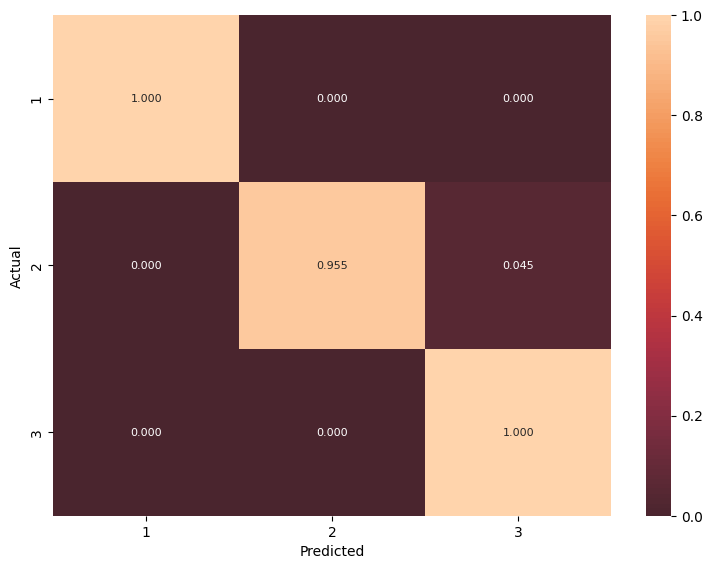

In [7]:
# 混合行列(confusion matrix)を表示する
# 結果ラベルの取得(混合行列の表示で使います)
result_labels = list(df_wine["target"].unique())

# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
# FeatureImportanceの表示
# FeatureImportanceとは目的変数の分類にどの程度寄与しているかを示す指標です
# 決定木系のモデルでしか使用できません

# FeatureImportance用にカラム名を加工（この関数はそのまま活用下さい）
def _convert_column_name_for_feature_importance(columns):
    new_columns = []
    for name_src in columns:
        new_columns.append(name_src)

    return new_columns

# figureをmargin付きで作成する（この関数はそのまま活用下さい）
def _make_figure_with_margin(ax_w_px=400, ax_h_px=300, ax_margin_px = (50, 50, 50, 50), fig_dpi=100):

    # サイズ指定のための処理 ↓↓ ここから ↓↓ 
    ax_w_inch = ax_w_px / fig_dpi
    ax_h_inch = ax_h_px / fig_dpi
    ax_margin_inch = (ax_margin_px[0] / fig_dpi,
                      ax_margin_px[1] / fig_dpi,
                      ax_margin_px[2] / fig_dpi,
                      ax_margin_px[3] / fig_dpi)  # Left,Top,Right,Bottom [inch]

    fig_w_inch = ax_w_inch + ax_margin_inch[0] + ax_margin_inch[2] 
    fig_h_inch = ax_h_inch + ax_margin_inch[1] + ax_margin_inch[3]

    fig = plt.figure(dpi=fig_dpi, figsize=(fig_w_inch, fig_h_inch))
    ax_p_w = [Size.Fixed(ax_margin_inch[0]),Size.Fixed(ax_w_inch)]
    ax_p_h = [Size.Fixed(ax_margin_inch[1]),Size.Fixed(ax_h_inch)]
    divider = Divider(fig, (0.0, 0.0, 1.0, 1.0), ax_p_w, ax_p_h, aspect=False)
    ax = Axes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1,ny=1))
    fig.add_axes(ax)
    return fig, ax

# FeatureImportanceをplotする（この関数はそのまま活用下さい）
def _plot_feature_importances(x_column_names, best_estimator):
    importances = pd.DataFrame(
        {"features": _convert_column_name_for_feature_importance(x_column_names),
         "importances": best_estimator.feature_importances_})

    importances = importances[importances['importances'] != 0] # 重要度ゼロのものは表示しない
    importances.sort_values(by="importances", inplace=True, ignore_index=True, ascending=True)
    
    fig, ax = _make_figure_with_margin(800, 100+50*len(importances), ax_margin_px = (150, 50, 50, 50))
    plt.barh(importances['features'], importances['importances'])
    plt.title("Feature Importances (Zero variables are hidden)", fontsize=14)
    plt.show()

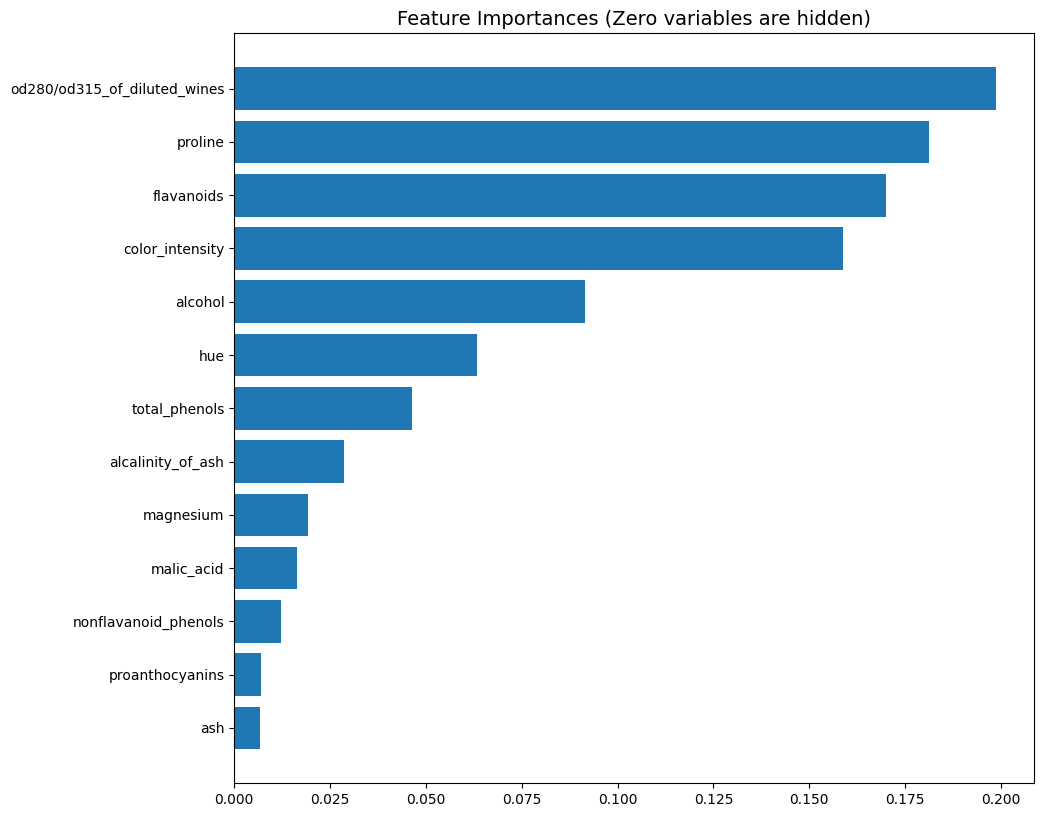

In [9]:
# ワイン分類モデルのFeatureImportanceを表示する
_plot_feature_importances(X_train.columns, rf_model)

### 考察
- 不正解データが1件となった
  - 結果としては良さそうに見えるが、過学習の可能性が高い
  - RandomForestのように木構造の非線形モデルでは、精度が出しやすい反面、学習データのバリエーションが少ないと過学習を起こしやすい
- 特徴量の重要度について
  - 特徴量の中ではフラボノイド（flavanoids）や色の濃さ（color_intensity）の影響度が高い
- 考えられる対策
  - 可能であればデータ量を増やす
    - 本データセットには、より大きなデータは存在しないため、今回は増やすことはできない
    - 実際のデータサイエンスの現場であれば、より多くのデータを収集する活動を行う等の対策を行う

### 🪻 練習プログラム4 あやめ分類モデルの評価[RandomForest] (25点)

以下の手順で、あやめの分類モデルを学習してみましょう。  

1️⃣ あやめのデータセットを読み込む  
2️⃣ RandomForestを使用して学習したモデルをjoblib.load()で読み込む  
3️⃣ 正答率(accuracy)の表示  
4️⃣ 不正解の個数を表示  
5️⃣ 分類レポート(classification report)の表示  
6️⃣ 混合行列(confusion matrix)の表示  
7️⃣ FeatureImportanceの表示  
8️⃣ 評価結果を考察  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

In [ ]:
# あやめのデータセットを読み込み

# 説明変数と目的変数に分ける

# 訓練データとテストデータに分割する(学習時と同じRANDOM_SEEDを使用することで、分割結果を再現できます)


In [ ]:
# 保存したモデルを読み込み


In [ ]:
# 正答率(accuracy)の表示

# 不正解の個数を表示


正答率(accuracy) = 0.9777777777777777
誤った個数：1


In [ ]:
# 分類レポート(classification report)を表示する


classification report


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,16.000000
Iris-versicolor,1.000000,0.944444,0.971429,18.000000
Iris-virginica,0.916667,1.000000,0.956522,11.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.972222,0.981481,0.975983,45.000000
weighted avg,0.979630,0.977778,0.977943,45.000000


confusion matrix


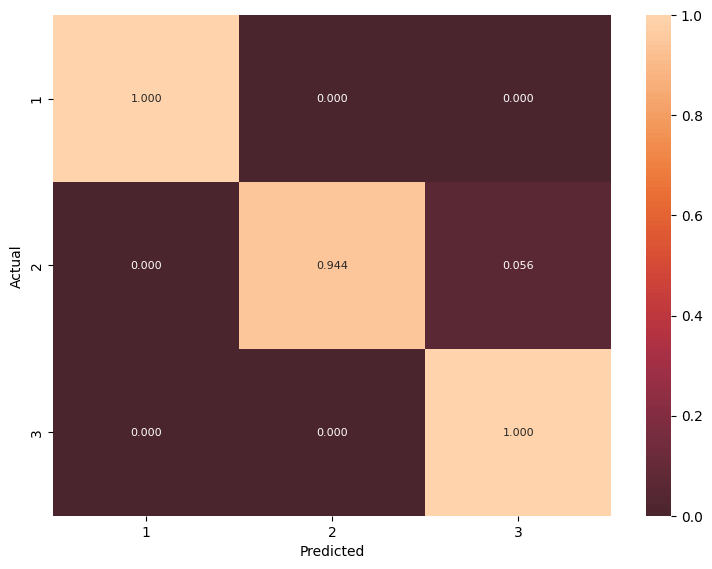

In [ ]:
# 混合行列(confusion matrix)を表示する


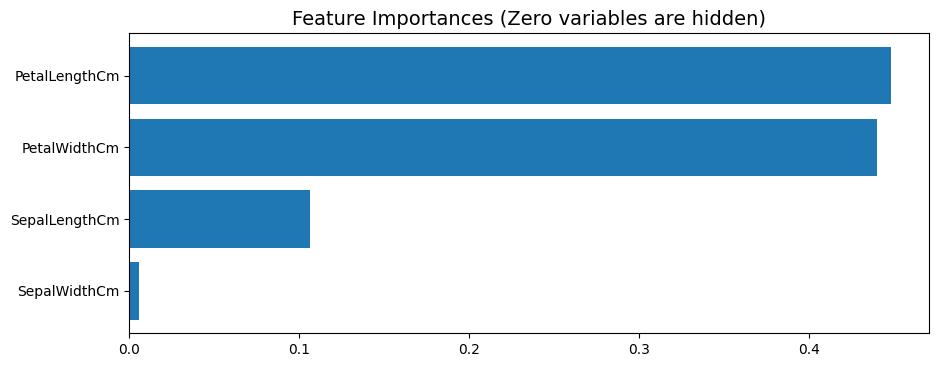

In [ ]:
# あやめ分類モデルのFeatureImportanceを表示する


In [ ]:
# 考察

# こちらにソースコメントで考察を記述して下さい。
# コードセルに書かれたコメントを読み取って採点していますので、マークダウンには書かないでください。


In [ ]:
#@title 送信処理用共通プログラム（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown 解答の送信に必要です。（中身は絶対に修正しないでください）

import os
os.makedirs(".client/python", exist_ok=True)  # 隠しフォルダを作成
!wget -q https://raw.githubusercontent.com/YasuharuSuzuki/25_isco3/main/91_notebook_client/src/setup.sh -O .client/setup.sh   # 外部コードをダウンロードして隠しフォルダに配置
!chmod +x ./.client/setup.sh
!bash ./.client/setup.sh # 実行

# モジュールの初期化
exec(open('.client/client_setup.py').read())

# ノートブック固有の設定
NOTEBOOK_PATH = "04_機械学習(分類)/04_RandomForestによる分類モデルの評価.ipynb"
set_notebook_config(NOTEBOOK_PATH)

In [ ]:
#@title 問4 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=4, button_name="練習プログラム"))